In [201]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

path = r'/Users/ravindra1/Documents/projects/data/raw/big-mac-historical-source-data.csv'
path0 = r'/Users/ravindra1/Documents/projects/data/raw/big-mac-source-data-v2.csv'
path1 = r'/Users/ravindra1/Documents/projects/data/raw/STTMINWGFG.csv'
df = pd.read_csv(path)
df0 = pd.read_csv(path0)
df1 = pd.read_csv(path1)

usa = df[df['name'] == 'United States']
usa1 = df0[df0['name'] == 'United States']


usa['date'] = pd.to_datetime(usa['date'], errors='coerce')
usa['date'] = usa['date'].dt.tz_localize(None)
usa1['date'] = pd.to_datetime(usa1['date'], errors='coerce')


combined = pd.concat([usa, usa1]).sort_index()
combined.sort_values(by='date', inplace=True)
combined['years'] = combined['date'].dt.year
combined['Big Mac Price'] = combined['local_price']

clean = [
    'name',
    'Big Mac Price',
    'years'
]

final_usa = combined[clean].copy()
df1['date'] = pd.to_datetime(df1['observation_date'], errors = 'coerce')
df1['years'] = df1['date'].dt.year
df1['Min Wages'] = df1['STTMINWGFG']

clean1 = [
    'Min Wages',
    'years'
]

final_wages = df1[clean1].copy()
final_wages

/var/folders/lb/0fsfxq2j6pqf8tx_k2gr0v780000gn/T/ipykernel_3213/799919074.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['date'] = pd.to_datetime(usa['date'], errors='coerce')
/var/folders/lb/0fsfxq2j6pqf8tx_k2gr0v780000gn/T/ipykernel_3213/799919074.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['date'] = usa['date'].dt.tz_localize(None)
/var/folders/lb/0fsfxq2j6pqf8tx_k2gr0v780000gn/T/ipykernel_3213/799919074.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Min Wages,years
0,3.35,1986
1,3.35,1987
2,3.35,1988
3,3.35,1989
4,3.35,1990
5,3.80,1991
6,4.25,1992
7,4.25,1993
8,4.25,1994
9,4.25,1995


In [210]:

merged = pd.merge(
    final_usa,
    final_wages,
    left_on='years',     # from Big Mac dataset
    right_on='years',    # from minimum wage dataset
    how='outer'         # or 'outer' if you want all data
)

clean2 = [
    'name',
    'years',
    'Big Mac Price',
    'Min Wages'
]

merged=merged[clean2]



In [212]:
merged['Big Mac Price Squared']=merged['Big Mac Price'] ** 2
merged

,name,years,Big Mac Price,Min Wages,Big Mac Price Squared
0,United States,1986,1.60,3.35,2.5600
1,United States,1987,1.60,3.35,2.5600
2,United States,1988,2.39,3.35,5.7121
3,United States,1989,2.02,3.35,4.0804
4,United States,1990,2.20,3.35,4.8400
5,United States,1991,2.25,3.80,5.0625
6,United States,1992,2.19,4.25,4.7961
7,United States,1993,2.28,4.25,5.1984
8,United States,1994,2.30,4.25,5.2900
9,United States,1995,2.32,4.25,5.3824


                            OLS Regression Results                            
Dep. Variable:              Min Wages   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           4.08e-16
Time:                        21:38:20   Log-Likelihood:                -64.409
No. Observations:                  56   AIC:                             132.8
Df Residuals:                      54   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.11

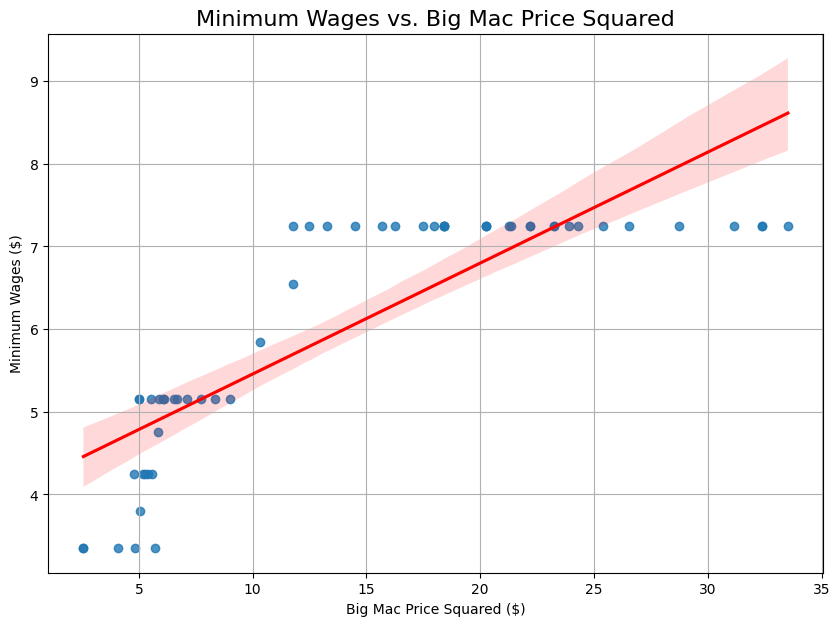

In [213]:
# 1. Define your y variable
y = merged['Min Wages']

# 2. Create your X DataFrame
X_poly = merged['Big Mac Price Squared']


# 4. Add the constant (intercept)
X_poly = sm.add_constant(X_poly)

# 5. Run the new OLS model
model_poly = sm.OLS(y, X_poly)
results_poly = model_poly.fit()

# 6. Print the new, better summary
print(results_poly.summary())

plt.figure(figsize=(10, 7))

# regplot() creates a scatter plot and fits/draws the OLS line
sns.regplot(
    data=merged,
    x='Big Mac Price Squared',
    y='Min Wages',
    line_kws={'color': 'red'}  # Makes the regression line red and easy to see
)

plt.title('Minimum Wages vs. Big Mac Price Squared', fontsize=16)
plt.xlabel('Big Mac Price Squared ($)')
plt.ylabel('Minimum Wages ($)')
plt.grid(True)
plt.show()